In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/DA Project (Trân - Phúc)/

/content/drive/MyDrive/DA Project (Trân - Phúc)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
import statsmodels.api as sm
import missingno as msno

### Testing Details

In [4]:
testing_details = pd.read_csv("data/StatewiseTestingDetails.csv")

In [5]:
testing_details

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
16331,2021-08-06,West Bengal,15999961.0,NaN,NaN
16332,2021-08-07,West Bengal,16045662.0,NaN,NaN
16333,2021-08-08,West Bengal,16092192.0,NaN,NaN
16334,2021-08-09,West Bengal,16122345.0,NaN,NaN


<Axes: >

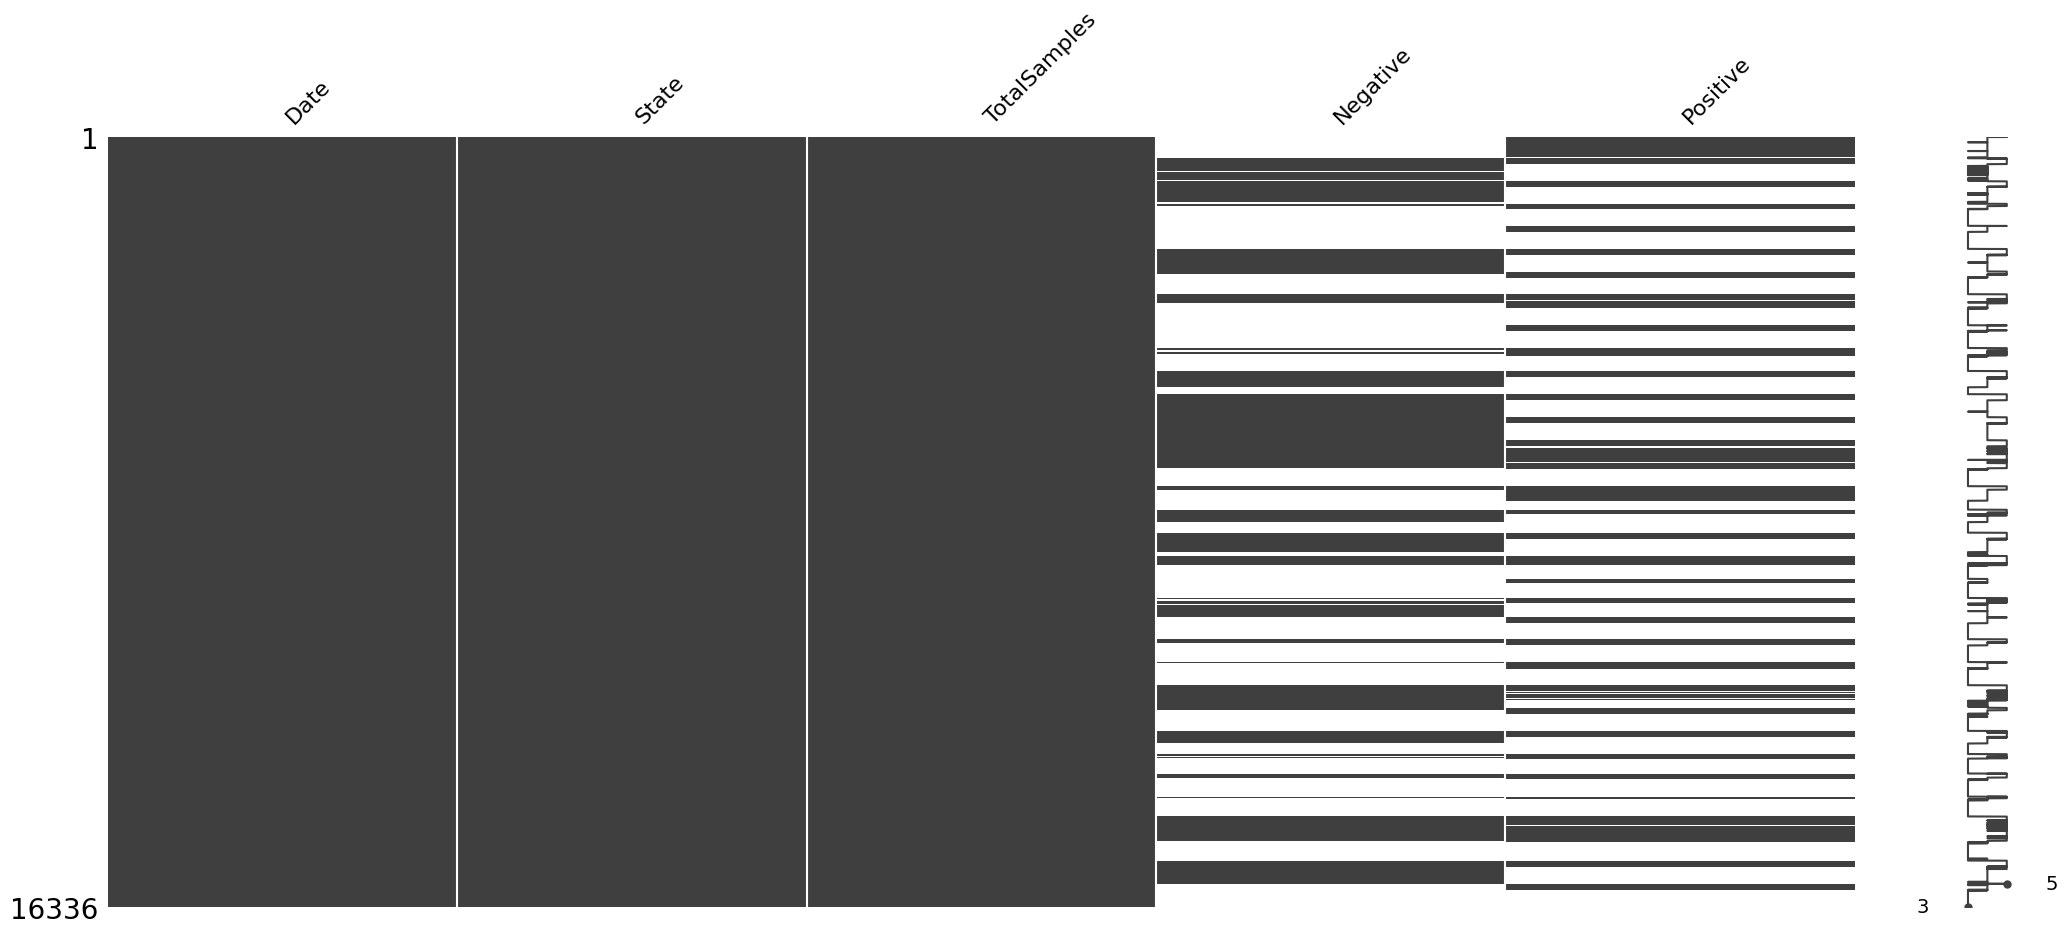

In [6]:
testing_dtails = testing_details.replace("-",np.nan)
msno.matrix(testing_details)

In [7]:
testing_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16336 entries, 0 to 16335
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          16336 non-null  object 
 1   State         16336 non-null  object 
 2   TotalSamples  16336 non-null  float64
 3   Negative      6969 non-null   object 
 4   Positive      5662 non-null   float64
dtypes: float64(2), object(3)
memory usage: 638.2+ KB


In [8]:
testing_details.State.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [9]:
testing_details.columns

Index(['Date', 'State', 'TotalSamples', 'Negative', 'Positive'], dtype='object')

In [10]:
testing_details.State.value_counts().sort_values()

State
Dadra and Nagar Haveli and Daman and Diu    170
Lakshadweep                                 195
Ladakh                                      294
Manipur                                     406
Meghalaya                                   409
Sikkim                                      413
Telangana                                   419
Tripura                                     447
Andaman and Nicobar Islands                 453
Mizoram                                     465
Assam                                       469
Arunachal Pradesh                           477
Puducherry                                  478
Chandigarh                                  479
Chhattisgarh                                482
Goa                                         483
Jharkhand                                   484
Nagaland                                    484
Gujarat                                     487
Andhra Pradesh                              488
Himachal Pradesh                  

**State where Testing is lesser are at top:**
- Dadra and Nagar Haveli and Daman and Diu 170
- Lakshadweep 195
- Ladakh 294
- Manipur 406
- Meghalaya 409

**State where Testing is higher are at bottom:**
- Madhya Pradesh                              492
- Odisha                                      492
- Haryana                                     492
- West Bengal                                 493
- Kerala                                      497

Might be due to poulation and covid spread in these states.

#### The top 3 States higgest and lowest Data Visualization¶




**States with Higher Testing**

In [11]:
testing_df_Haryana = testing_details[testing_details.State=='Haryana']
testing_df_Kerala = testing_details[testing_details.State=='Kerala']
testing_df_WestBengal = testing_details[testing_details.State=='West Bengal']

<Axes: title={'center': 'Haryana dataset'}>

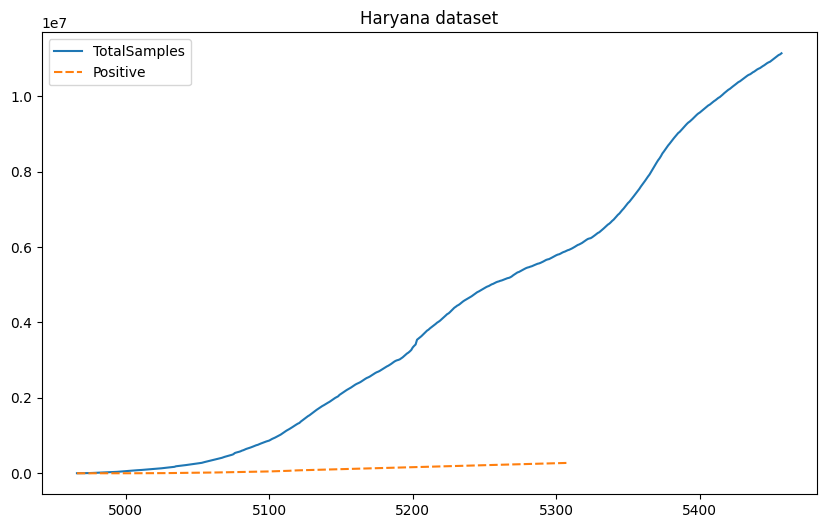

In [12]:
plt.figure(figsize=(10,6))
plt.title("Haryana dataset")
# Line chart
sns.lineplot(data=testing_df_Haryana)

<Axes: title={'center': 'Kerala dataset'}>

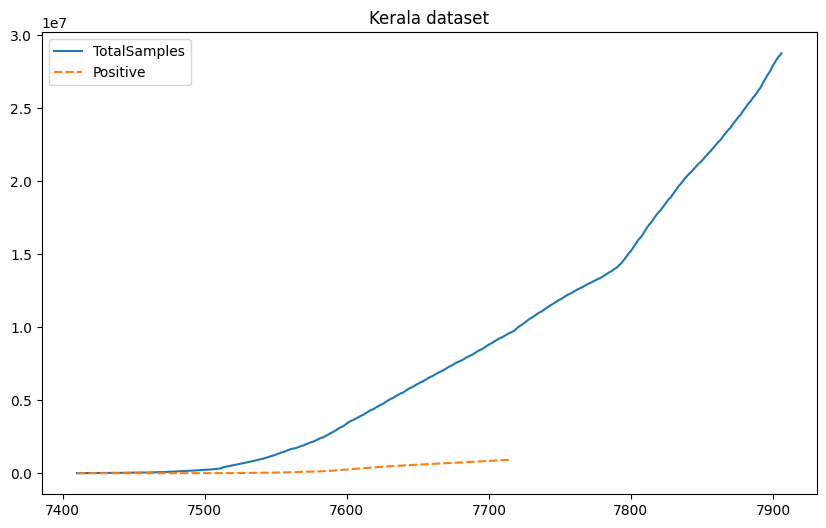

In [13]:
plt.figure(figsize=(10,6))
plt.title("Kerala dataset")
sns.lineplot(data=testing_df_Kerala)

<Axes: title={'center': 'West Bengal dataset'}>

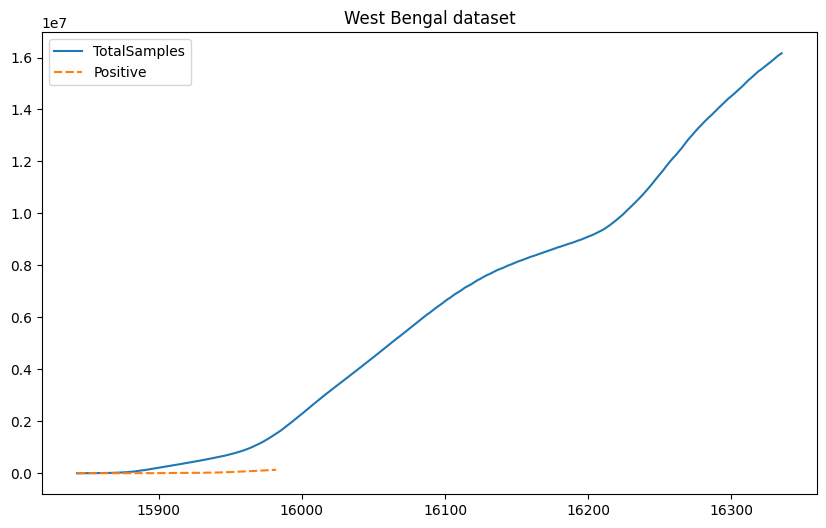

In [14]:
plt.figure(figsize=(10,6))
plt.title("West Bengal dataset")
sns.lineplot(data=testing_df_WestBengal)

**States with Lower Testing**

In [15]:
testing_df_Dadra = testing_details[testing_details.State=='Dadra and Nagar Haveli and Daman and Diu']
testing_df_Lakshadweep = testing_details[testing_details.State=='Lakshadweep']
testing_df_Ladakh = testing_details[testing_details.State=='Ladakh']

<Axes: title={'center': 'Dadra and Nagar Haveli dataset'}>

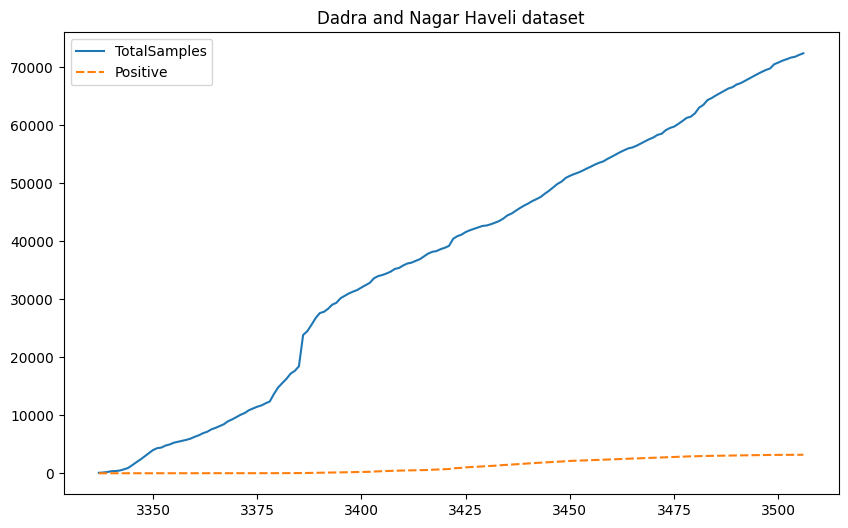

In [16]:
plt.figure(figsize=(10,6))

# Add title
plt.title("Dadra and Nagar Haveli dataset")

# Line chart
sns.lineplot(data=testing_df_Dadra)

<Axes: title={'center': 'Lakshadweep dataset'}>

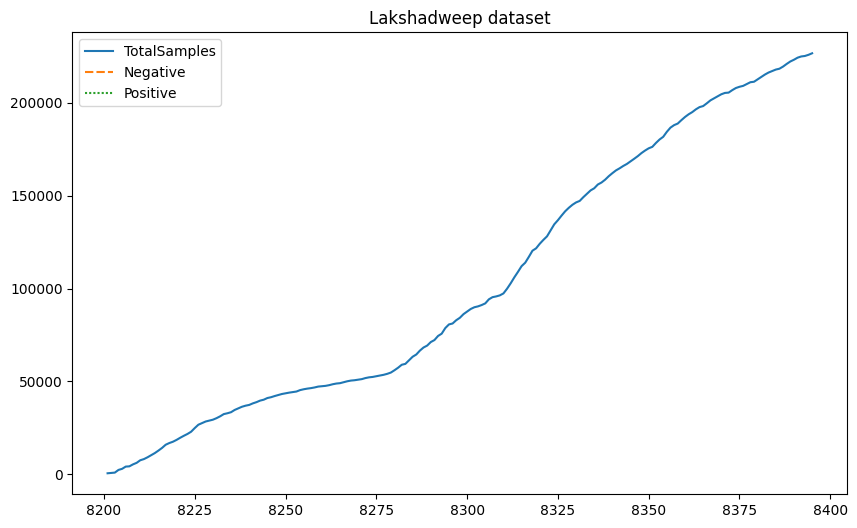

In [17]:
plt.figure(figsize=(10,6))

# Add title
plt.title("Lakshadweep dataset")

# Line chart
sns.lineplot(data=testing_df_Lakshadweep)

<Axes: title={'center': 'Ladakh dataset'}>

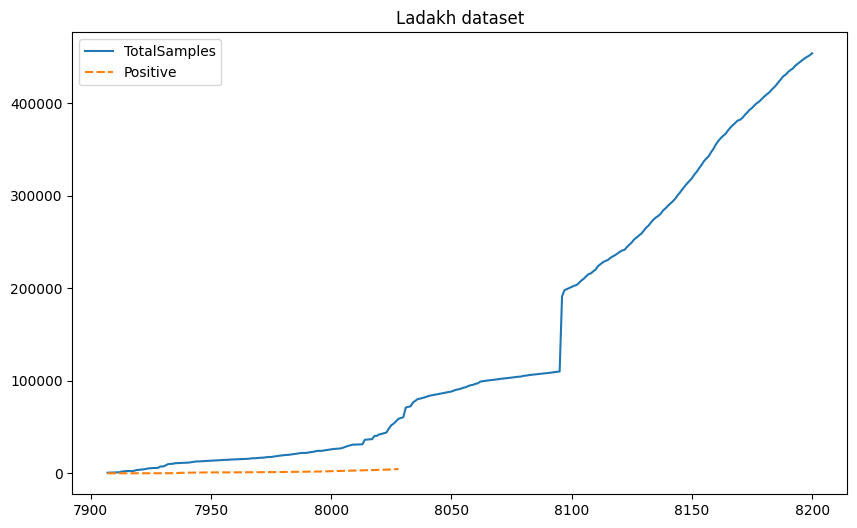

In [18]:
plt.figure(figsize=(10,6))

# Add title
plt.title("Ladakh dataset")

# Line chart
sns.lineplot(data=testing_df_Ladakh)

#### Total Sample followed by State

In [19]:
total_sample_state = testing_details.groupby(by =
                                             'State').sum()['TotalSamples'].to_frame('TotalSamples').sort_values(by =
                                                                                                                 "TotalSamples",
                                                                                                                 ascending = False)
total_sample_state

,TotalSamples
State,
Uttar Pradesh,1.138818e+10
Bihar,7.392796e+09
Maharashtra,7.334574e+09
Karnataka,6.773248e+09
Tamil Nadu,6.711189e+09
Andhra Pradesh,4.967773e+09
Gujarat,4.623914e+09
Delhi,4.310596e+09
Kerala,4.269006e+09


In [20]:
fig = px.bar(testing_details,x="TotalSamples", y="State", orientation='h')
fig.update_xaxes(tickfont=dict(color='black', size=14))
fig.update_yaxes(tickfont=dict(color='black', size=14))
fig.update_layout(
    title_text='<b>Number of Samples Tested <b>',
    title_x=0.5,
    autosize=False,
    width= 1100,
    height= 1000)
fig.update_traces(marker_color='red')
fig.show()

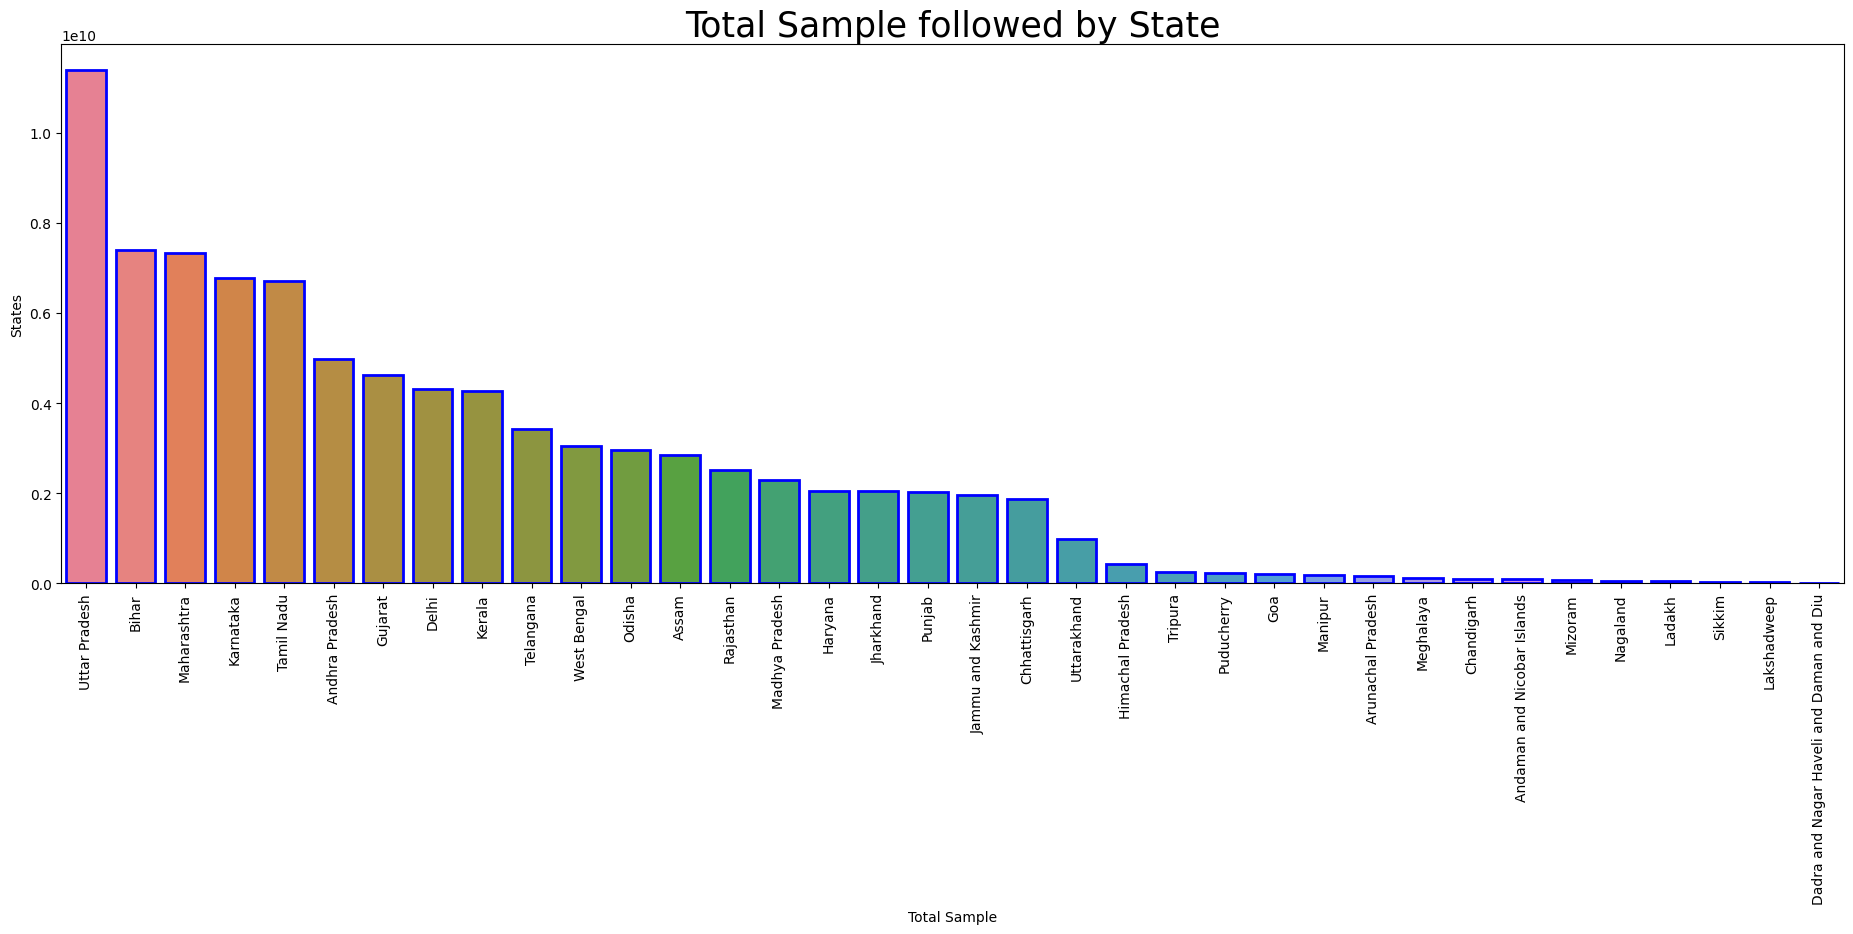

In [21]:
fig = plt.figure(figsize=(23,7))
plt.title("Total Sample followed by State", size=25)
ax = sns.barplot(data = total_sample_state, x = total_sample_state.index,
                 y = total_sample_state.TotalSamples, linewidth = 2,
                 edgecolor='blue', hue = total_sample_state.index)
plt.xticks(rotation=90)
plt.xlabel("Total Sample")
plt.ylabel("States")
plt.show()

###### Comment

This bar chart displays the total number of samples tested for COVID-19 or number of observations followed across different states or regions.

The chart reveals a significant variation in the total sample size across the different states. A few states, such as Uttar Pradesh, Bihar, Maharashtra, and Karnataka, have substantially larger sample sizes compared to the rest, as indicated by the taller bars.

This type of visualization can be useful for quickly identifying regions or states that may require additional sampling efforts or further investigation, as well as those that have already been adequately sampled or studied.

Overall, the chart effectively communicates the relative differences in otal number of  tested for COVID-19 across various states or regions, allowing for a high-level comparison and potential identification of outliers or areas of focus.


#### Total number of samples collected for Covid-19 testing(Statewise) followed Time

In [22]:
testing_details.Date = pd.to_datetime(testing_details.Date, format="%Y-%m-%d")
fig = px.line(testing_details, x='Date', y='TotalSamples', color='State', title='Total number of samples collected for Covid-19 testing(Statewise) followed Time' , template="plotly_dark")

fig.show()

#### The continuous postive infections

In [23]:
continous_positive = testing_details[testing_details.Positive.notnull()]

In [24]:
start_day = continous_positive.groupby(by = 'State')['Date'].min()
end_day = continous_positive.groupby(by = 'State')['Date'].max()


In [25]:
the_continous_positive_infections = pd.merge(start_day, end_day, on = 'State')
the_continous_positive_infections.columns = ['Start Day', 'End Day']
the_continous_positive_infections

,Start Day,End Day
State,,
Andaman and Nicobar Islands,2020-04-17,2021-07-19
Andhra Pradesh,2020-04-02,2020-08-10
Arunachal Pradesh,2020-04-09,2020-08-15
Assam,2020-04-02,2020-08-21
Bihar,2020-04-05,2020-08-12
Chandigarh,2020-04-02,2020-08-18
Chhattisgarh,2020-04-02,2020-08-21
Dadra and Nagar Haveli and Daman and Diu,2020-04-09,2020-10-20
Delhi,2020-04-07,2020-08-15


In [26]:
the_continous_positive_infections['Start Day'] = pd.to_datetime(the_continous_positive_infections['Start Day'])
the_continous_positive_infections['End Day'] = pd.to_datetime(the_continous_positive_infections['End Day'])

Text(0.5, 1.0, 'Total number of samples collected for Covid-19 testing(Statewise) followed Time')

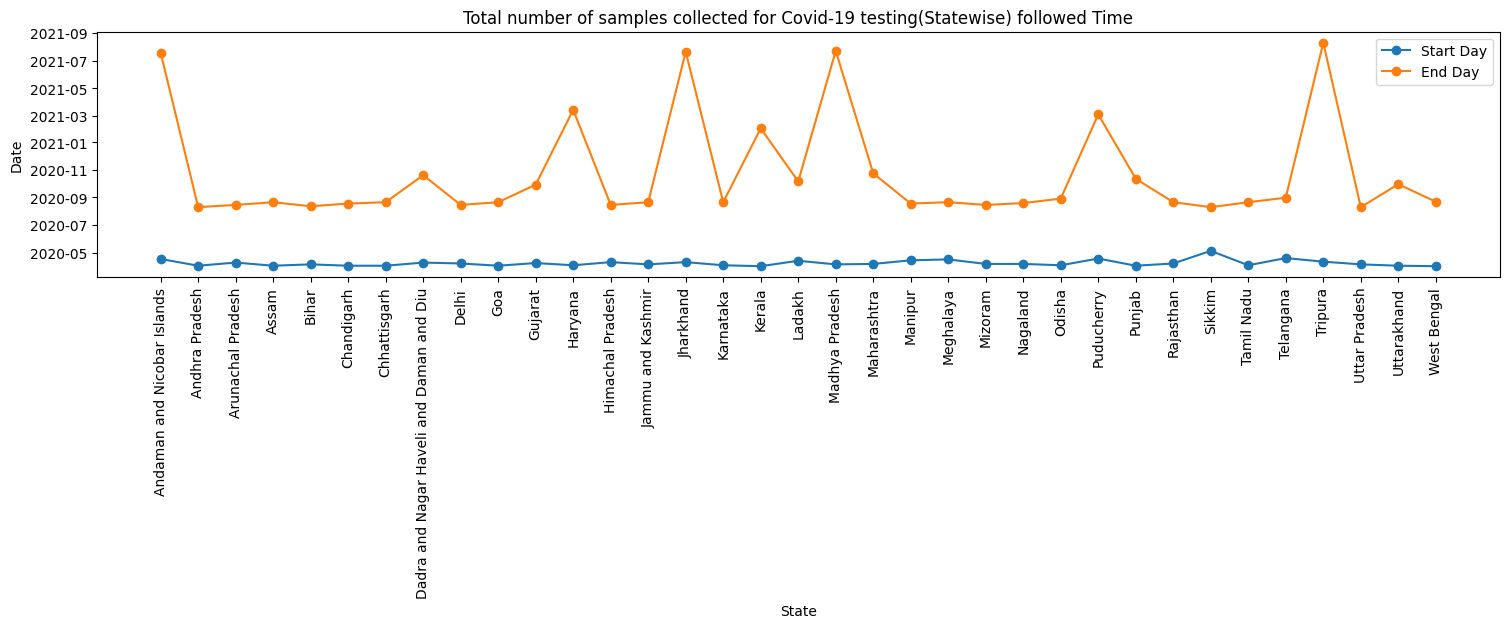

In [27]:
plt.figure(figsize=(15, 6))
plt.plot(the_continous_positive_infections.index, the_continous_positive_infections['Start Day'], marker='o', label='Start Day')
plt.plot(the_continous_positive_infections.index, the_continous_positive_infections['End Day'], marker='o', label='End Day')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('State')
plt.ylabel('Date')
plt.title("Total number of samples collected for Covid-19 testing(Statewise) followed Time")

##### Comment

Timeline showing the number of consecutive days of COVID-19 infections, represented by two vertical lines (blue and orange) for each state in India, between September 2020 and September 2021 The horizontal axis represents the states of India, arranged alphabetically. The vertical axis represents time.

**Trend**

*The chart shows some of the following general trends:*

  * There are significant differences in the number of days of continuous COVID-19 infection between states. Some states, such as Kerala, Maharashtra and Tamil Nadu, have had significantly higher number of consecutive COVID-19 infection days than other states, such as Arunachal Pradesh, Himachal Pradesh and Mizoram.

  * There is some evidence of seasonality in the number of consecutive days of COVID-19 infection. The number of consecutive days of COVID-19 infection tends to increase in winter and decrease in summer.

**Conclude:**

The timeline shows some general trends in the number of consecutive days of COVID-19 infections in India. The number of consecutive days of COVID-19 infection tends to decrease over time, but there are significant differences between states. There is some evidence of seasonality in the number of consecutive days of COVID-19 infection.

#### The proportion of negative and positive case based on States

In [28]:
# convert to negative to float64
testing_details['Negative'] = pd.to_numeric(testing_details['Negative'], errors='coerce')

# Convert the column to float
testing_details['Negative'] = testing_details['Negative'].astype('float64')

In [29]:
# total negative and positive based on State
grouped_data = testing_details.groupby(by = 'State')[['Negative','Positive']].sum()

grouped_data.head()

,Negative,Positive
State,,
Andaman and Nicobar Islands,1.210000e+03,1763591.0
Andhra Pradesh,3.991600e+09,3859260.0
Arunachal Pradesh,1.156258e+08,51245.0
Assam,2.163110e+06,2065991.0
Bihar,2.299000e+03,1859345.0


In [30]:
import numpy as np

grouped_data['Negative'].fillna(0, inplace=True)
grouped_data['Positive'].fillna(0, inplace=True)

grouped_data['Negative_Percentage'] = (grouped_data['Negative'] /
                                      (grouped_data['Negative'] +
                                       grouped_data['Positive'])) * 100
grouped_data['Positive_Percentage'] = (grouped_data['Positive'] /
                                      (grouped_data['Negative'] +
                                       grouped_data['Positive'])) * 100

grouped_data['Negative_Percentage'] = grouped_data['Negative_Percentage'].apply(lambda x: str(round(x, 2)) + '%')
grouped_data['Positive_Percentage'] = grouped_data['Positive_Percentage'].apply(lambda x: str(round(x, 2)) + '%')

grouped_data.head()

,Negative,Positive,Negative_Percentage,Positive_Percentage
State,,,,
Andaman and Nicobar Islands,1.210000e+03,1763591.0,0.07%,99.93%
Andhra Pradesh,3.991600e+09,3859260.0,99.9%,0.1%
Arunachal Pradesh,1.156258e+08,51245.0,99.96%,0.04%
Assam,2.163110e+06,2065991.0,51.15%,48.85%
Bihar,2.299000e+03,1859345.0,0.12%,99.88%


In [31]:
grouped_data[['Negative_Percentage','Positive_Percentage']]

,Negative_Percentage,Positive_Percentage
State,,
Andaman and Nicobar Islands,0.07%,99.93%
Andhra Pradesh,99.9%,0.1%
Arunachal Pradesh,99.96%,0.04%
Assam,51.15%,48.85%
Bihar,0.12%,99.88%
Chandigarh,99.93%,0.07%
Chhattisgarh,85.24%,14.76%
Dadra and Nagar Haveli and Daman and Diu,97.28%,2.72%
Delhi,6.08%,93.92%


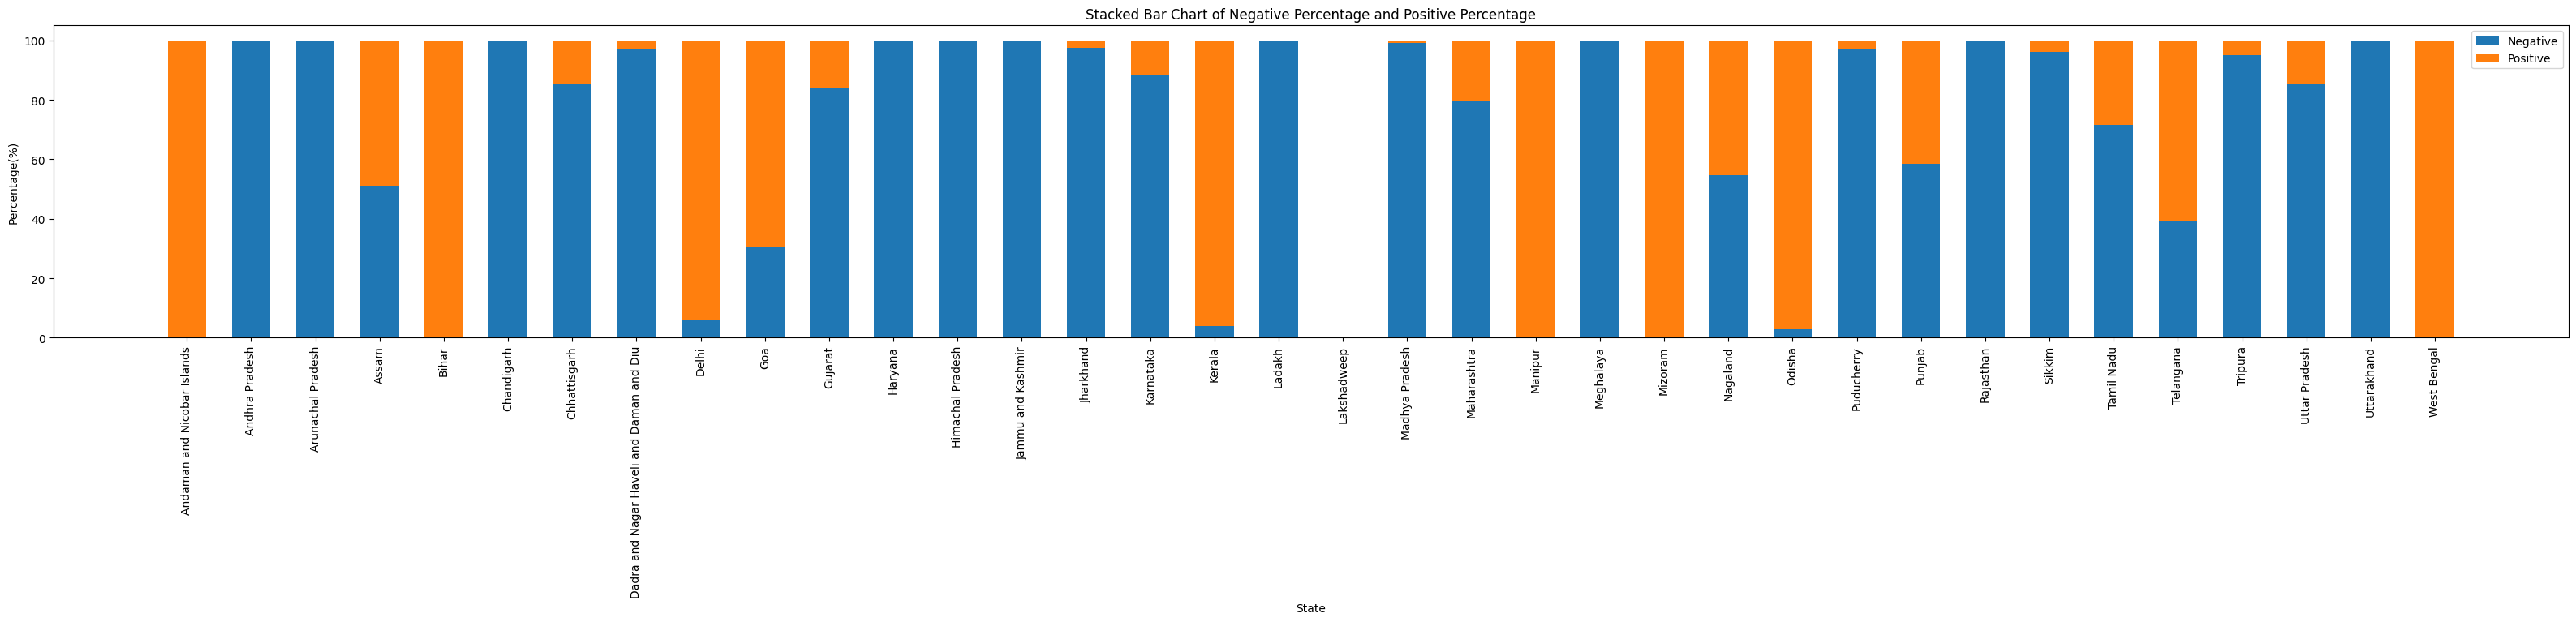

In [32]:
plt.figure(figsize=(40, 5))

states = grouped_data.index.tolist()

x = range(len(states))

bottom = np.zeros(len(states))
for col in ['Negative_Percentage', 'Positive_Percentage']:
    # Loại bỏ ký tự '%' trước khi chuyển đổi thành số
    column_data = grouped_data[col].str.replace('%', '').astype(float)
    plt.bar(x, column_data, bottom=bottom, label=col.split('_')[0],
            width = 0.6)
    bottom += column_data

plt.xlabel('State')
plt.ylabel('Percentage(%)')

plt.title('Stacked Bar Chart of Negative Percentage and Positive Percentage')

plt.xticks(x, states)

plt.legend()

plt.xticks(rotation=90)

plt.show()

###### Commnet

Stacked chart shows the percentage of positive and negative COVID-19 cases by state in India. Manufacturing states of India, arranged alphabetically.

**The chart is divided into two parts:**

  * Orange bar: Indicates the percentage of positive COVID-19 cases.

  * Blue bar: Indicates the percentage of Covid-19 negative cases.

**Percentage analysis of positive COVID-19 cases:**

The chart shows that the percentage of Covid-19 positive cases varies significantly between states. Some states with a high percentage of positive COVID-19 cases, considered limited, are Maharashtra (22.8%), Kerala (21.2%) and Karnataka (13.5%). Other states have lower percentages of positive Covid-19 cases, such as Mizoram (0.2%), Nagaland (0.3%) and Sikkim (0.5%).

**Percent analysis of HIV-19 negative cases:**

The chart shows that the percentage of Covid-19 negative cases also varies significantly between states. States with a high percentage of Covid-19 positive cases tend to have a low percentage of Covid-19 negative cases, and vice versa. For example, the state of Maharashtra has a high percentage of positive COVID-19 cases (22.8%) and a low percentage of negative Covid-19 cases (77.2%). In contrast, Mizoram state has a low percentage of Covid-19 positive cases (0.2%) and a high percentage of Covid-19 negative cases (99.8%).

**Conclude:**

The stacked chart provides insight into the percentage of positive and negative COVID-19 cases by state in India. The chart shows that there are significant differences in the percentage of Covid-19 infections between states. States with a high percentage of Covid-19 positive cases tend to have a low percentage of Covid-19 negative cases, and vice versa.